<a href="https://colab.research.google.com/github/nandinivashistha/shark/blob/main/Gender_age_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NOTEBOOK

In [2]:
!pip install kaggle

IMPORTING DATASET FROM KAGGLE

In [14]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! cp kaggle.json ~/.kaggle/

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets download jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install tensorflow

IMPORTING NECESSARY LIBRARIES

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from keras.layers import BatchNormalization,Dropout,Flatten,Dense,Add,Input,Activation
from keras.layers import Input, MaxPooling2D,Convolution2D
from keras.optimizers import Adam, Adagrad,Adadelta,Adamax,RMSprop
from keras.models import Model,Sequential
from keras.regularizers import L2

EXTRACT DATA FROM ZIP FILE

In [10]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 1.6 MB/s eta 0:00:00


In [11]:
import patoolib

In [19]:
patoolib.extract_archive("/content/utkface-new.zip")

INFO patool: Extracting /content/utkface-new.zip ...
INFO:patool:Extracting /content/utkface-new.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_5z9xeuzw -- /content/utkface-new.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_5z9xeuzw -- /content/utkface-new.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/utkface-new.zip extracted to `utkface-new' (multiple files in root).
INFO:patool:... /content/utkface-new.zip extracted to `utkface-new' (multiple files in root).


'utkface-new'

In [20]:
fldr="/content/utkface-new/UTKFace"

In [21]:
import os
import cv2
files=os.listdir(fldr)

In [22]:
ages=[]
genders=[]
images=[]
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  print(total)
  image=cv2.imread(total)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(48,48))

  images.append(image)

Streaming output truncated to the last 5000 lines.
/content/utkface-new/UTKFace/8_1_2_20170109203456419.jpg.chip.jpg
/content/utkface-new/UTKFace/23_1_1_20170113010457776.jpg.chip.jpg
/content/utkface-new/UTKFace/50_1_0_20170104213643230.jpg.chip.jpg
/content/utkface-new/UTKFace/85_1_0_20170110183057797.jpg.chip.jpg
/content/utkface-new/UTKFace/26_0_2_20170116180352453.jpg.chip.jpg
/content/utkface-new/UTKFace/58_0_0_20170104212025853.jpg.chip.jpg
/content/utkface-new/UTKFace/24_1_0_20170103180635111.jpg.chip.jpg
/content/utkface-new/UTKFace/25_0_3_20170119171146199.jpg.chip.jpg
/content/utkface-new/UTKFace/29_1_1_20170116161645150.jpg.chip.jpg
/content/utkface-new/UTKFace/53_0_0_20170109015513486.jpg.chip.jpg
/content/utkface-new/UTKFace/85_1_2_20170110183021416.jpg.chip.jpg
/content/utkface-new/UTKFace/24_1_2_20170116170010620.jpg.chip.jpg
/content/utkface-new/UTKFace/25_0_4_20170117195058860.jpg.chip.jpg
/content/utkface-new/UTKFace/30_1_2_20170116192047079.jpg.chip.jpg
/content/utk

In [23]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

In [24]:
print(len(genders))

23708


In [25]:
import matplotlib.pyplot as plt

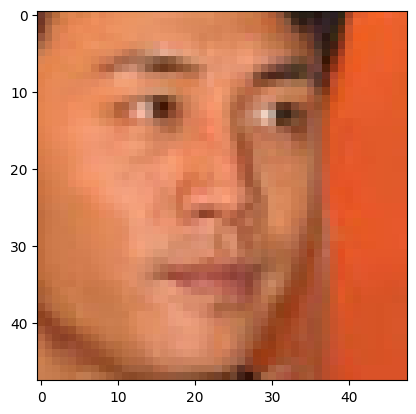

In [26]:
plt.imshow(images[0])

In [27]:
import numpy as np

In [28]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [29]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [30]:
# finding the number of elements in dataset
values,  counts=np.unique(genders, return_counts=True)
print(counts)

[12391 11317]


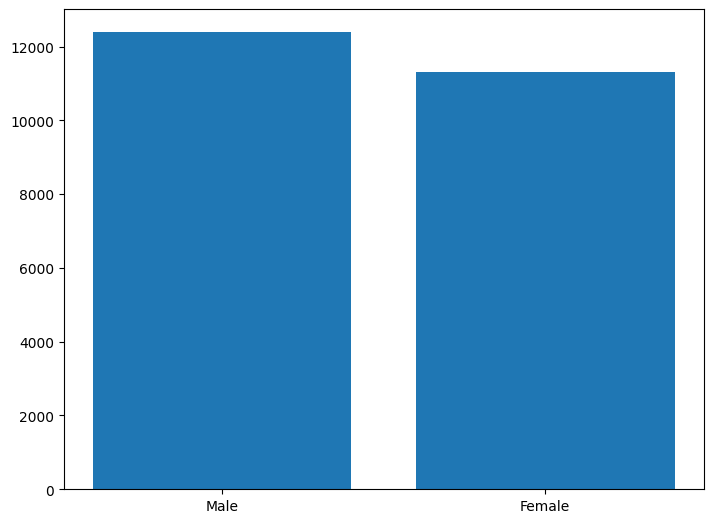

In [31]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [32]:
values,  counts=np.unique(ages, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [33]:
val=values.tolist()
cnt=counts.tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

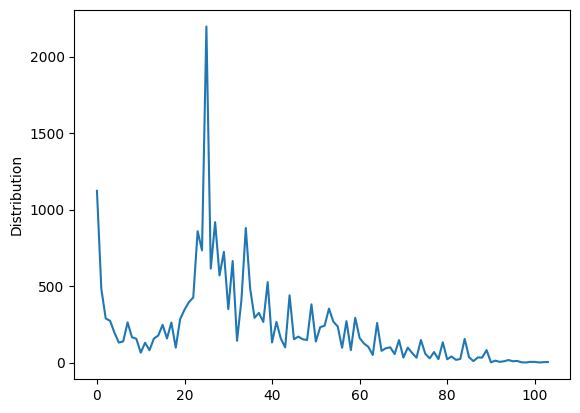

In [34]:
plt.plot(counts)
plt.xlabel=('Ages')
plt.ylabel('Distribution')
plt.show

In [35]:
len(gender)

2

In [36]:
len(ages)

23708

In [37]:
labels=[ ]
i=0
while i<len(ages):
  label=[ ]
  label.append(ages[i])
  label.append(genders[i])
  labels.append(label)
  i+=1

In [38]:
images_f_2=images_f/255

In [39]:
images_f_2.shape

(23708, 48, 48, 3)

In [40]:
label_f=np.array(labels)

In [41]:
label_f.shape

(23708, 2)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2 ,label_f, test_size=0.25)

In [44]:
y_train[0:5]

array([[18,  1],
       [25,  1],
       [38,  1],
       [36,  1],
       [10,  1]])

In [45]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [46]:
y_train_2[0][0:5]

array([1, 1, 1, 1, 1])

In [47]:
y_train_2[1][0:5]

array([18, 25, 38, 36, 10])

In [48]:
from keras.models import Sequential
model=Sequential()

DEFINING MODEL

In [49]:
def  Convolution(input_tensor, filters, model=Sequential()):
  x=Convolution2D(filters=filters, kernel_size=(3,3) ,padding="same",strides=(1,1),kernel_regularizer=L2(0.001))(input_tensor)
  x=Dropout(0.1)(x)
  x=Activation('relu')(x)
  return x

In [50]:

def model(input_shape):
  inputs=Input((input_shape))
  conv_1=Convolution(inputs,32)
  maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
  conv_2=Convolution(maxp_1,64)
  maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
  conv_3=Convolution(maxp_2,128)
  maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
  conv_4=Convolution(maxp_3,256)
  maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
  conv_5=Convolution(maxp_4,512)
  maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
  flatten=Flatten()(maxp_5)
  dense_1=Dense(64,activation='relu')(flatten)
  dense_2=Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
  output_2=Dense(1,activation='relu',name='age_out')(drop_2)
  model=Model(inputs=[inputs],outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"],optimizer= "Adam",metrics=["accuracy"])
  return model

In [51]:
Model=model((48,48,3))

In [52]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [53]:
from keras.callbacks import ModelCheckpoint

In [54]:
file_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [55]:
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=150,callbacks=callback_list)

Epoch 1/150
278/278 [==============================] - ETA: 0s - loss: 16.9193 - sex_out_loss: 0.7003 - age_out_loss: 15.8960 - sex_out_accuracy: 0.5173 - age_out_accuracy: 0.0487
Epoch 1: val_loss improved from inf to 18.15045, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 15s 25ms/step - loss: 16.9193 - sex_out_loss: 0.7003 - age_out_loss: 15.8960 - sex_out_accuracy: 0.5173 - age_out_accuracy: 0.0487 - val_loss: 18.1504 - val_sex_out_loss: 0.6912 - val_age_out_loss: 17.1952 - val_sex_out_accuracy: 0.5143 - val_age_out_accuracy: 0.0430
Epoch 2/150
  1/278 [..............................] - ETA: 4s - loss: 17.7493 - sex_out_loss: 0.6864 - age_out_loss: 16.7989 - sex_out_accuracy: 0.5469 - age_out_accuracy: 0.0312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


277/278 [============================>.] - ETA: 0s - loss: 13.0093 - sex_out_loss: 0.6391 - age_out_loss: 12.0732 - sex_out_accuracy: 0.6282 - age_out_accuracy: 0.0481
Epoch 2: val_loss improved from 18.15045 to 13.55340, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 5s 16ms/step - loss: 12.9981 - sex_out_loss: 0.6390 - age_out_loss: 12.0620 - sex_out_accuracy: 0.6281 - age_out_accuracy: 0.0480 - val_loss: 13.5534 - val_sex_out_loss: 0.5776 - val_age_out_loss: 12.6409 - val_sex_out_accuracy: 0.7154 - val_age_out_accuracy: 0.0294
Epoch 3/150
276/278 [============================>.] - ETA: 0s - loss: 10.7909 - sex_out_loss: 0.5550 - age_out_loss: 9.8777 - sex_out_accuracy: 0.7255 - age_out_accuracy: 0.0469
Epoch 3: val_loss did not improve from 13.55340
278/278 [==============================] - 5s 16ms/step - loss: 10.8042 - sex_out_loss: 0.5556 - age_out_loss: 9.8903 - sex_out_accuracy: 0.7250 - age_out_accuracy: 0.0467 - val_loss: 14.5231 - val_sex_ou

In [56]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 7.4007 - sex_out_loss: 0.2457 - age_out_loss: 6.1659 - sex_out_accuracy: 0.8915 - age_out_accuracy: 0.0429


[7.400728225708008,
 0.24565255641937256,
 6.1659321784973145,
 0.8915134072303772,
 0.042854733765125275]

In [57]:
pred=Model.predict(x_test)

186/186 [==============================] - 1s 2ms/step


In [58]:
pred[1]

array([[58.699352],
       [45.960255],
       [24.207724],
       ...,
       [40.176334],
       [ 5.611877],
       [24.410141]], dtype=float32)

PLOTTING MODEL

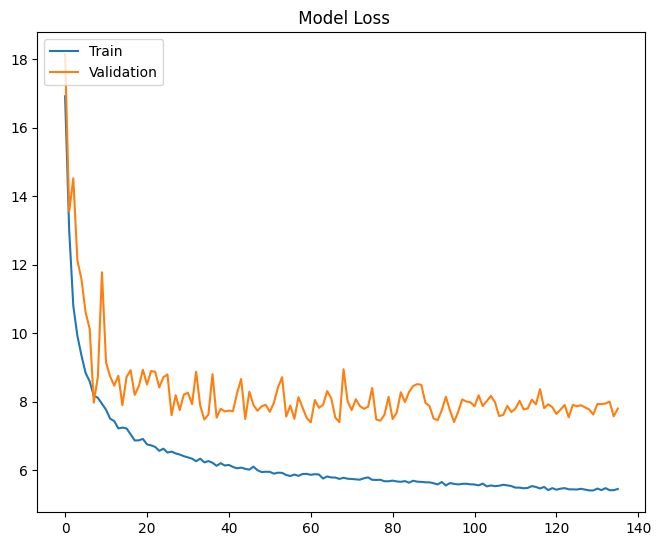

In [59]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title(' Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

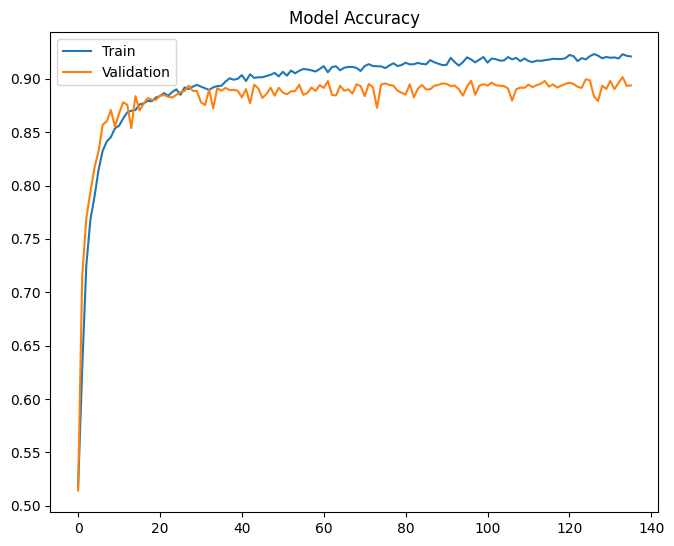

In [60]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

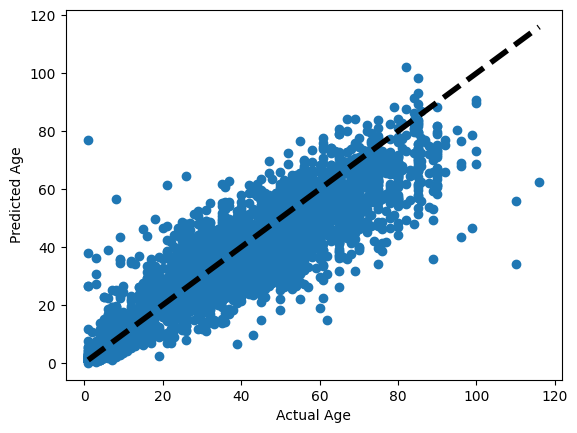

In [61]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot( [y_test_2[1].min(),y_test_2[1].max()], [y_test_2[1].min(),  y_test_2[1].max()], 'k--' ,lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

MAKING REPORT OF THE MODEL(GENDER ONLY)

In [62]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
results=confusion_matrix(y_test_2[0],Pred_l)

<Axes: >

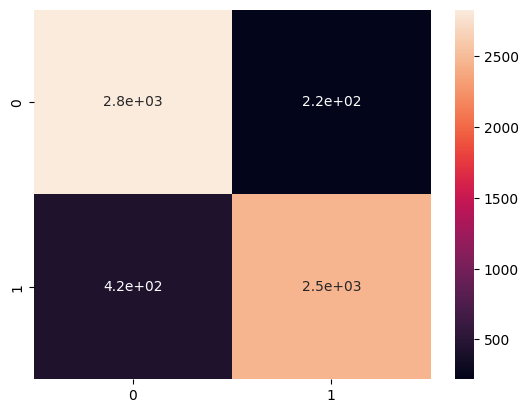

In [65]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [66]:
def test_image(ind, images_f , images_f_2, Model):
  plt.imshow(images_f[ind])
  image_test=(images_f_2[ind])
  pred_l=Model.predict(np.array([image_test]))
  sex_f=['Male','Female']
  age=int(np.round(pred_l[1][0]))
  sex=int(np.round(pred_l[0][0]))
  print("Predicted Age is " +str(age))
  print("Predicted Gender is " +sex_f[sex])


TESTING THE IMAGES

1/1 [==============================] - 0s 233ms/step
Predicted Age is 9
Predicted Gender is Male


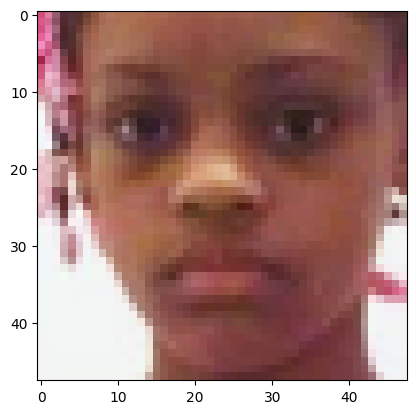

In [67]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 18ms/step
Predicted Age is 27
Predicted Gender is Female


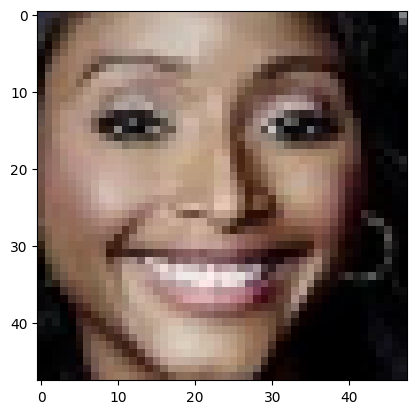

In [68]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 17ms/step
Predicted Age is 66
Predicted Gender is Male


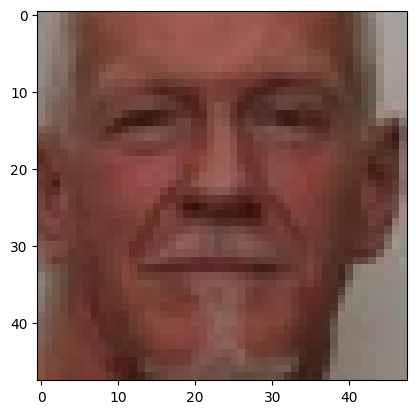

In [69]:
test_image(2030,images_f,images_f_2,Model)